# Section B: Practical questions with applied multiple choice



## General Rules:
- This is an open book examination.
- Students may make use of a calculator.
- This is an online examination where you will access a computer; however you may not communicate with other students in any form.
- Headphone are prohibited.
- The use of AI (chatGPT etc.) is prohibited.
- All cell phones are to be switched off for the duration of the exam.
- The invigilator will not assist you with the explanation of questions.
- Students are prohibited from conversing in any manner with other students.

## My Name and Surname

Name =                        
</br>
Surname = 

## Instructions: 
- Complete the questions below and answer the associated multiple-choice questions on Athena. It is recommended to complete each part and then answer the associated Athena questions. 
- Remember to **submit this notebook** once you have completed all the questions.
- Please open only **one instance** of Athena when completing this exam.
- Although this notebook will not necessarily be assessed directly, sections of it could be used to contribute to your overall portfolio of evidence.
- Do not edit or remove the ### START FUNCTION or ### END FUNCTION comments. 
- Do not add any code outside of the code blocks you are required to edit. (use another notebook if necessary)
- Remember the honour code, and that this is a **proctored exam**.



### Part 1: SQL Queries
You are provided with a pre-populated SQLite database named `bike_store.db`. Download [here](https://github.com/Explore-AI/Public-Data/blob/master/Data/Bike_store/bike_store.db) if you haven't already. Your task is to explore this database and write a series of SQL queries to perform the tasks detailed below. Queries should be optimised to run within 20 seconds or less.


The tables and columns included in the `bike_store.db` are:
- `brands`: brand_id, brand_name
- `staff`: staff_id, first_name, last_name, email, phone, active, store_id, manager_id
- `categories`: category_id, category_name
- `customers`: customer_id, first_name, last_name, phone, email, street, city, state, zip_code
- `order_items`: order_id, item_id, product_id, quantity, list_price, discount
- `orders`: order_id, customer_id, order_status, order_date, required_date, shipped_date, store_id, staff_id
- `products`: product_id, product_name, brand_id, category_id, model_year, list_price
- `stock`: store_id, product_id, quantity
- `stores`: store_id, store_name, phone, email, street, city, state, zip_code

In [ ]:
pip install tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [ ]:
pip install plotly


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.8 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/14.8 MB 7.1 MB/s eta 0:00:02
   ----------- ---------------------------- 4.2/14.8 MB 7.6 MB/s eta 0:00:02
   -------------- ------------------------- 5.5/14.8 MB 7.3 MB/s eta 0:00:02
   -------------------- ------------------- 7.6/14.8 MB 7.5 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/14.8 MB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 9.2/14.8 MB 6.4 MB/s eta 0:00:01
   -------------------------- ------------- 9.7/14.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------- ----------- 10.5/14.8 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 11.3/14.8 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 12.1/14.8 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/14.8 MB 5.1 MB/s eta 0:00:01
 

In [1]:
import os
import json
import random
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from tabulate import tabulate
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [2]:
# Load your database and create a database connection.
# You can connect to the sql database in any way you wish. 
# Use this method if you are unsure how to proceed. 
# Ensure the bike_store.db file is in the same directory as this notebook.
# Open connection
conn = sqlite3.connect("bike_store.db")
cur = conn.cursor()

In [3]:
cur.execute("SELECT * FROM customers LIMIT 5;")
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

(1, 'Debra', 'Burks', None, 'debra.burks@yahoo.com', '9273 Thorne Ave. ', 'Orchard Park', 'NY', 14127)
(2, 'Kasha', 'Todd', None, 'kasha.todd@yahoo.com', '910 Vine Street ', 'Campbell', 'CA', 95008)
(3, 'Tameka', 'Fisher', None, 'tameka.fisher@aol.com', '769C Honey Creek St. ', 'Redondo Beach', 'CA', 90278)
(4, 'Daryl', 'Spence', None, 'daryl.spence@aol.com', '988 Pearl Lane ', 'Uniondale', 'NY', 11553)
(5, 'Charolette', 'Rice', '(916) 381-6003', 'charolette.rice@msn.com', '107 River Dr. ', 'Sacramento', 'CA', 95820)


In [4]:
cur.execute("SELECT * FROM customers LIMIT 5;")
rows = cur.fetchall()

In [5]:
# Run SQL query
cur.execute("SELECT * FROM customers LIMIT 5;") 
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

(1, 'Debra', 'Burks', None, 'debra.burks@yahoo.com', '9273 Thorne Ave. ', 'Orchard Park', 'NY', 14127)
(2, 'Kasha', 'Todd', None, 'kasha.todd@yahoo.com', '910 Vine Street ', 'Campbell', 'CA', 95008)
(3, 'Tameka', 'Fisher', None, 'tameka.fisher@aol.com', '769C Honey Creek St. ', 'Redondo Beach', 'CA', 90278)
(4, 'Daryl', 'Spence', None, 'daryl.spence@aol.com', '988 Pearl Lane ', 'Uniondale', 'NY', 11553)
(5, 'Charolette', 'Rice', '(916) 381-6003', 'charolette.rice@msn.com', '107 River Dr. ', 'Sacramento', 'CA', 95820)


In [ ]:
# Execute query
cur.execute("SELECT * FROM categories")  
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

(1, 'Children Bicycles')
(2, 'Comfort Bicycles')
(3, 'Cruisers Bicycles')
(4, 'Cyclocross Bicycles')
(5, 'Electric Bikes')
(6, 'Mountain Bikes')
(7, 'Road Bikes')


In [ ]:
# Execute Query
cur.execute("SELECT * FROM Staff LIMIT 10;")
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

(1, 'Fabiola', 'Jackson', 'fabiola.jackson@bikes.shop', '(831) 555-5554', 1, 1, None)
(2, 'Mireya', 'Copeland', 'mireya.copeland@bikes.shop', '(831) 555-5555', 1, 1, 1.0)
(3, 'Genna', 'Serrano', 'genna.serrano@bikes.shop', '(831) 555-5556', 1, 1, 2.0)
(4, 'Virgie', 'Wiggins', 'virgie.wiggins@bikes.shop', '(831) 555-5557', 1, 1, 2.0)
(5, 'Jannette', 'David', 'jannette.david@bikes.shop', '(516) 379-4444', 1, 2, 1.0)
(6, 'Marcelene', 'Boyer', 'marcelene.boyer@bikes.shop', '(516) 379-4445', 1, 2, 5.0)
(7, 'Venita', 'Daniel', 'venita.daniel@bikes.shop', '(516) 379-4446', 1, 2, 5.0)
(8, 'Kali', 'Vargas', 'kali.vargas@bikes.shop', '(972) 530-5555', 1, 3, 1.0)
(9, 'Layla', 'Terrell', 'layla.terrell@bikes.shop', '(972) 530-5556', 1, 3, 7.0)
(10, 'Bernardine', 'Houston', 'bernardine.houston@bikes.shop', '(972) 530-5557', 1, 3, 7.0)


In [ ]:
# The following tables are present in the bike_store.db file
cur.execute('''SELECT name FROM sqlite_master WHERE type='table';''')
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

('brands',)
('staff',)
('categories',)
('customers',)
('order_items',)
('orders',)
('products',)
('stock',)
('stores',)


In [ ]:
# The following tables are present in the bike_store.db file
pd.read_sql('''SELECT * FROM sqlite_master WHERE type='table';''',conn)

,type,name,tbl_name,rootpage,sql
0,table,brands,brands,4,"CREATE TABLE ""brands"" (\n""brand_id"" INTEGER,\n..."
1,table,staff,staff,9,"CREATE TABLE ""staff"" (\n""staff_id"" INTEGER,\n ..."
2,table,categories,categories,5,"CREATE TABLE ""categories"" (\n""category_id"" INT..."
3,table,customers,customers,2,"CREATE TABLE ""customers"" (\n""customer_id"" INTE..."
4,table,order_items,order_items,6,"CREATE TABLE ""order_items"" (\n""order_id"" INTEG..."
5,table,orders,orders,7,"CREATE TABLE ""orders"" (\n""order_id"" INTEGER,\n..."
6,table,products,products,8,"CREATE TABLE ""products"" (\n""product_id"" INTEGE..."
7,table,stock,stock,10,"CREATE TABLE ""stock"" (\n""store_id"" INTEGER,\n ..."
8,table,stores,stores,11,"CREATE TABLE ""stores"" (\n""store_id"" INTEGER,\n..."


In [ ]:
# The following tables are present in the bike_store.db file
cur.execute('''SELECT * FROM sqlite_master WHERE type='table';''')
rows = cur.fetchall()

# Print results
for row in rows:
    print(row)

('table', 'brands', 'brands', 4, 'CREATE TABLE "brands" (\n"brand_id" INTEGER,\n  "brand_name" TEXT\n)')
('table', 'staff', 'staff', 9, 'CREATE TABLE "staff" (\n"staff_id" INTEGER,\n  "first_name" TEXT,\n  "last_name" TEXT,\n  "email" TEXT,\n  "phone" TEXT,\n  "active" INTEGER,\n  "store_id" INTEGER,\n  "manager_id" REAL\n)')
('table', 'categories', 'categories', 5, 'CREATE TABLE "categories" (\n"category_id" INTEGER,\n  "category_name" TEXT\n)')
('table', 'customers', 'customers', 2, 'CREATE TABLE "customers" (\n"customer_id" INTEGER,\n  "first_name" TEXT,\n  "last_name" TEXT,\n  "phone" TEXT,\n  "email" TEXT,\n  "street" TEXT,\n  "city" TEXT,\n  "state" TEXT,\n  "zip_code" INTEGER\n)')
('table', 'order_items', 'order_items', 6, 'CREATE TABLE "order_items" (\n"order_id" INTEGER,\n  "item_id" INTEGER,\n  "product_id" INTEGER,\n  "quantity" INTEGER,\n  "list_price" REAL,\n  "discount" REAL\n)')
('table', 'orders', 'orders', 7, 'CREATE TABLE "orders" (\n"order_id" INTEGER,\n  "customer_i

In [ ]:
### START FUNCTION
def get_ordered_most(conn):

### Insert your code here
    query = """
    SELECT p.product_name, SUM(oi.quantity) AS total_quantity
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_quantity DESC
    LIMIT 1;
    """
    
    # Execute query
    cur = conn.cursor()
    cur.execute(query)
    output = cur.fetchone()  # Fetch the most ordered product
    
    return output  # Returns a tuple (product_name, total_quantity)
### END FUNCTION

In [ ]:
get_ordered_most(conn)

('Electra Cruiser 1 (24-Inch) - 2016', 296)

In [ ]:
for row in cur.execute('SELECT * FROM Products'):
    print(row)


(1, 'Trek 820 - 2016', 9, 6, 2016, 379.99)
(2, 'Ritchey Timberwolf Frameset - 2016', 5, 6, 2016, 749.99)
(3, 'Surly Wednesday Frameset - 2016', 8, 6, 2016, 999.99)
(4, 'Trek Fuel EX 8 29 - 2016', 9, 6, 2016, 2899.99)
(5, 'Heller Shagamaw Frame - 2016', 3, 6, 2016, 1320.99)
(6, 'Surly Ice Cream Truck Frameset - 2016', 8, 6, 2016, 469.99)
(7, 'Trek Slash 8 27.5 - 2016', 9, 6, 2016, 3999.99)
(8, 'Trek Remedy 29 Carbon Frameset - 2016', 9, 6, 2016, 1799.99)
(9, 'Trek Conduit+ - 2016', 9, 5, 2016, 2999.99)
(10, 'Surly Straggler - 2016', 8, 4, 2016, 1549.0)
(11, 'Surly Straggler 650b - 2016', 8, 4, 2016, 1680.99)
(12, 'Electra Townie Original 21D - 2016', 1, 3, 2016, 549.99)
(13, 'Electra Cruiser 1 (24-Inch) - 2016', 1, 3, 2016, 269.99)
(14, "Electra Girl's Hawaii 1 (16-inch) - 2015/2016", 1, 3, 2016, 269.99)
(15, 'Electra Moto 1 - 2016', 1, 3, 2016, 529.99)
(16, 'Electra Townie Original 7D EQ - 2016', 1, 3, 2016, 599.99)
(17, 'Pure Cycles Vine 8-Speed - 2016', 4, 3, 2016, 429.0)
(18, "Pure 

In [ ]:
for row in cur.execute('SELECT * FROM Categories'):
    print(row)


(1, 'Children Bicycles')
(2, 'Comfort Bicycles')
(3, 'Cruisers Bicycles')
(4, 'Cyclocross Bicycles')
(5, 'Electric Bikes')
(6, 'Mountain Bikes')
(7, 'Road Bikes')


In [ ]:
for row in cur.execute('SELECT * FROM Stock'):
    print(row)

(1, 1, 27)
(1, 2, 5)
(1, 3, 6)
(1, 4, 23)
(1, 5, 22)
(1, 6, 0)
(1, 7, 8)
(1, 8, 0)
(1, 9, 11)
(1, 10, 15)
(1, 11, 8)
(1, 12, 16)
(1, 13, 13)
(1, 14, 8)
(1, 15, 3)
(1, 16, 4)
(1, 17, 2)
(1, 18, 16)
(1, 19, 4)
(1, 20, 26)
(1, 21, 24)
(1, 22, 29)
(1, 23, 9)
(1, 24, 10)
(1, 25, 10)
(1, 26, 16)
(1, 27, 21)
(1, 28, 20)
(1, 29, 13)
(1, 30, 30)
(1, 31, 2)
(1, 32, 0)
(1, 33, 10)
(1, 34, 2)
(1, 35, 18)
(1, 36, 26)
(1, 37, 12)
(1, 38, 13)
(1, 39, 2)
(1, 40, 24)
(1, 41, 10)
(1, 42, 0)
(1, 43, 2)
(1, 44, 1)
(1, 45, 15)
(1, 46, 19)
(1, 47, 21)
(1, 48, 5)
(1, 49, 8)
(1, 50, 29)
(1, 51, 2)
(1, 52, 18)
(1, 53, 17)
(1, 54, 11)
(1, 55, 11)
(1, 56, 15)
(1, 57, 1)
(1, 58, 1)
(1, 59, 22)
(1, 60, 19)
(1, 61, 30)
(1, 62, 21)
(1, 63, 4)
(1, 64, 30)
(1, 65, 10)
(1, 66, 12)
(1, 67, 19)
(1, 68, 30)
(1, 69, 4)
(1, 70, 3)
(1, 71, 25)
(1, 72, 9)
(1, 73, 7)
(1, 74, 9)
(1, 75, 23)
(1, 76, 15)
(1, 77, 16)
(1, 78, 13)
(1, 79, 13)
(1, 80, 11)
(1, 81, 25)
(1, 82, 1)
(1, 83, 13)
(1, 84, 11)
(1, 85, 23)
(1, 86, 19)
(1, 87, 

In [7]:
import sqlite3
import pandas as pd

# Open a connection to the database
conn = sqlite3.connect("bike_store.db")
cur = conn.cursor()

# Execute SQL query to retrieve unique first names from the customers table
cur.execute("SELECT DISTINCT first_name FROM customers;")
rows = cur.fetchall()

# Extract unique first names into a list
unique_first_names = [row[0] for row in rows]

# Count the number of unique first names
unique_first_names_count = len(unique_first_names)
print(f"Number of unique first names: {unique_first_names_count}")

Number of unique first names: 1265


In [9]:
import sqlite3
import pandas as pd

# Open a connection to the database
conn = sqlite3.connect("bike_store.db")

# Load the 'customers' table into a DataFrame
df = pd.read_sql_query("SELECT * FROM customers;", conn)

# Find the minimum first name
min_first_name = df['first_name'].min()
print(f"The minimum first name in the customers table is: {min_first_name}")

The minimum first name in the customers table is: Aaron


In [33]:
# Function to analyze climate geography influence
### START FUNCTION
def climate_geography_influence(df, column):
    # Ensure required columns exist - Update these as necessary based on the actual dataset
    required_columns = {'product_id', 'list_price'}  # Adjust based on your analysis needs

    if not required_columns.issubset(df.columns):
        raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

    # Aggregate the data by the mean of specified columns
    aggregated_data = df.groupby(column)[list(required_columns)].mean().reset_index()

    return aggregated_data
### END FUNCTION

In [35]:
# Load the relevant data into a DataFrame
df = pd.read_sql_query("SELECT * FROM products;", conn)

# Display the column names to understand the structure
print(df.columns)

Index(['product_id', 'product_name', 'brand_id', 'category_id', 'model_year',
       'list_price'],
      dtype='object')


In [36]:
# Specify the column to group by; this should be relevant to analysis
column = 'category_id'  # Example: grouping by product category

# Call the function with the DataFrame and specified column
result = climate_geography_influence(df, column)

# Display the result
print(result)

   category_id   list_price  product_id
0            1   287.786610  206.338983
1            2   682.123333  211.966667
2            3   730.412308  171.230769
3            4  2542.793000  139.700000
4            5  3281.656667  176.041667
5            6  1649.757333   79.166667
6            7  3175.357333  157.000000


In [12]:
### START FUNCTION
def climate_geography_influence(df,column):
    # Insert your code here
    df = pd.read_csv("bike_store.db")
    # Ensure required columns exist
    required_columns = {'Elevation', 'Min_temperature_C', 'Max_temperature_C'}
    
    if not required_columns.issubset(df.columns):
        raise ValueError(f"Missing required columns: {required_columns - set(df.columns)}")

    # Aggregate the data by the mean of specified columns
    aggregated_data = df.groupby(column)[list(required_columns)].mean().reset_index()
    
    return aggregated_data
### END FUNCTION

In [37]:
climate_geography_influence(df,column)

,category_id,list_price,product_id
0,1,287.786610,206.338983
1,2,682.123333,211.966667
2,3,730.412308,171.230769
3,4,2542.793000,139.700000
4,5,3281.656667,176.041667
5,6,1649.757333,79.166667
6,7,3175.357333,157.000000


In [10]:
print(df)

      customer_id  first_name last_name           phone  \
0               1       Debra     Burks            None   
1               2       Kasha      Todd            None   
2               3      Tameka    Fisher            None   
3               4       Daryl    Spence            None   
4               5  Charolette      Rice  (916) 381-6003   
...           ...         ...       ...             ...   
1440         1441      Jamaal  Morrison            None   
1441         1442      Cassie     Cline            None   
1442         1443      Lezlie      Lamb            None   
1443         1444      Ivette     Estes            None   
1444         1445       Ester   Acevedo            None   

                        email                  street           city state  \
0       debra.burks@yahoo.com       9273 Thorne Ave.    Orchard Park    NY   
1        kasha.todd@yahoo.com        910 Vine Street        Campbell    CA   
2       tameka.fisher@aol.com   769C Honey Creek St.   Re

In [20]:
### START FUNCTION
def get_ordered_most(conn):
    query = """
    SELECT p.product_name, SUM(oi.quantity) AS total_quantity
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_quantity DESC
    LIMIT 1;
    """
    
    # Execute query
    cur = conn.cursor()
    cur.execute(query)
    output = cur.fetchone()  # Fetch the most ordered product
    
    return output  # Returns a tuple (product_name, total_quantity)
### END FUNCTION

In [21]:
get_ordered_most(conn)

('Electra Cruiser 1 (24-Inch) - 2016', 296)

In [22]:
# The following tables are present in the bike_store.db file
pd.read_sql('''SELECT tbl_name FROM sqlite_master WHERE type='table';''',conn)

,tbl_name
0,brands
1,staff
2,categories
3,customers
4,order_items
5,orders
6,products
7,stock
8,stores


#### 1.1 Determine which product has been ordered the most
Write a function called `get_ordered_most(conn)` to find the product that has been ordered the most in terms of quantity. The result should return the product name, product_id, and the total quantity sold in a dictionary. Example output expected: `{'product_name':'Coca-Cola', 'product_id': 1, 'nr_orders':1000}`


In [23]:
pd.read_sql('''SELECT product_name, ORDER_ITEMS.product_ID, COUNT(order_id) as nr_orders  
            FROM order_items LEFT JOIN Products ON Order_items.Product_ID = Products.Product_ID 
            GROUP BY Product_name, ORDER_ITEMS.Product_id  ''',conn)

,product_name,product_id,nr_orders
0,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,257,3
1,Electra Amsterdam Fashion 7i Ladies' - 2017,81,24
2,Electra Amsterdam Original 3i - 2015/2017,70,22
3,Electra Amsterdam Original 3i Ladies' - 2017,82,23
4,Electra Amsterdam Royal 8i - 2017/2018,258,1
...,...,...,...
302,Trek X-Caliber 8 - 2017,29,24
303,Trek X-Caliber 8 - 2018,118,2
304,Trek X-Caliber Frameset - 2018,135,3
305,Trek XM700+ - 2018,194,5


In [24]:
### START FUNCTION
def get_ordered_most(conn):
    output = pd.read_sql('''SELECT product_name, ORDER_ITEMS.product_ID, COUNT(order_id) as nr_orders  
                         FROM order_items LEFT JOIN Products ON Order_items.Product_ID = Products.Product_ID 
                         GROUP BY Product_name, ORDER_ITEMS.Product_id  ''',conn)
### Insert your code here
    dict = output.to_dict()
    return dict
### END FUNCTION



In [25]:
get_ordered_most(conn)

{'product_name': {0: "Electra Amsterdam Fashion 3i Ladies' - 2017/2018",
  1: "Electra Amsterdam Fashion 7i Ladies' - 2017",
  2: 'Electra Amsterdam Original 3i - 2015/2017',
  3: "Electra Amsterdam Original 3i Ladies' - 2017",
  4: 'Electra Amsterdam Royal 8i - 2017/2018',
  5: 'Electra Amsterdam Royal 8i Ladies - 2018',
  6: 'Electra Cruiser 1 (24-Inch) - 2016',
  7: 'Electra Cruiser 1 (24-Inch) - 2016',
  8: 'Electra Cruiser 1 - 2016/2017/2018',
  9: "Electra Cruiser 1 Ladies' - 2018",
  10: 'Electra Cruiser 1 Tall - 2016/2018',
  11: "Electra Cruiser 7D (24-Inch) Ladies' - 2016/2018",
  12: "Electra Cruiser 7D (24-Inch) Ladies' - 2016/2018",
  13: 'Electra Cruiser 7D - 2016/2017/2018',
  14: "Electra Cruiser 7D Ladies' - 2016/2018",
  15: 'Electra Cruiser 7D Tall - 2016/2018',
  16: 'Electra Cruiser Lux 1 - 2016/2018',
  17: 'Electra Cruiser Lux 1 - 2017',
  18: "Electra Cruiser Lux 1 Ladies' - 2018",
  19: 'Electra Cruiser Lux 3i - 2018',
  20: "Electra Cruiser Lux 3i Ladies' - 20

In [27]:
### START FUNCTION
def get_ordered_most(conn):
    query = '''
    SELECT 
        p.product_name, 
        oi.product_id, 
        SUM(oi.quantity) AS nr_orders
    FROM order_items oi
    LEFT JOIN products p ON oi.product_id = p.product_id
    GROUP BY p.product_name, oi.product_id
    ORDER BY nr_orders DESC
    LIMIT 1;
    '''
    
    # Execute query and fetch result
    output = pd.read_sql(query, conn)
    
    # Convert to dictionary format {'product_name': ..., 'product_id': ..., 'nr_orders': ...}
    if not output.empty:
        result = {
            'product_name': output.iloc[0]['product_name'],
            'product_id': int(output.iloc[0]['product_id']),
            'nr_orders': int(output.iloc[0]['nr_orders'])
        }
        return result
    else:
        return None  # Return None if no data found

In [28]:
get_ordered_most(conn)

{'product_name': 'Surly Ice Cream Truck Frameset - 2016',
 'product_id': 6,
 'nr_orders': 167}

#### 1.2 Identify which store has the widest *range* of products in stock
Write a function called `find_store_with_most_unique_prod(conn)` to find out which store carries the most unique products (different `product_id`) in its inventory (stock). The query should return the store name and the number of different products available in a dictionary, structured as follows: {'nr_items': 100, 'store_name': 'The Suparette'} . Remember to only consider products that are in stock at each of the stores. 



In [29]:
# The following tables are present in the bike_store.db file
pd.read_sql('''SELECT tbl_name FROM sqlite_master WHERE type='table';''',conn)

,tbl_name
0,brands
1,staff
2,categories
3,customers
4,order_items
5,orders
6,products
7,stock
8,stores


In [32]:
# The following tables are present in the bike_store.db file
pd.read_sql("SELECT * FROM Order_items",conn)

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [31]:
### START FUNCTION
def find_store_with_most_unique_prod(conn): 
    query = """
    SELECT Stores.store_name, COUNT(DISTINCT Products.product_id) AS nr_items
    FROM Products
    JOIN Stock ON Products.Product_id = Stock.Product_id
    JOIN Stores ON Stock.store_id = Stores.store_id
    WHERE Stock.quantity > 0
    GROUP BY Stores.store_name
    ORDER BY nr_items DESC
    LIMIT 1;
    """

    output = pd.read_sql(query, conn).to_dict(orient='records')[0]
    return output
#print (output)
### END FUNCTION

In [ ]:
find_store_with_most_unique_prod(conn)

{'store_name': 'Rowlett Bikes', 'nr_items': 308}

In [ ]:
### START FUNCTION
def find_store_with_most_unique_prod(conn): 
    query = """
    SELECT 
        s.store_name, 
        COUNT(DISTINCT p.product_id) AS nr_items
    FROM stock st
    JOIN products p ON st.product_id = p.product_id
    JOIN stores s ON st.store_id = s.store_id
    WHERE st.quantity > 0
    GROUP BY s.store_name
    ORDER BY nr_items DESC
    LIMIT 1;
    """

    output = pd.read_sql(query, conn)

    # Ensure there's at least one result before accessing index [0]
    if not output.empty:
        return {
            'store_name': output.iloc[0]['store_name'],
            'nr_items': int(output.iloc[0]['nr_items'])  # Convert to integer
        }
    else:
        return None  # Return None if no stores have products in stock

### END FUNCTION

In [ ]:
find_store_with_most_unique_prod(conn)

{'store_name': 'Rowlett Bikes', 'nr_items': 308}

#### 1.3 Determine how many unique users ordered a specific product
Create a function `find_unique_customers_for_prod(conn)` to find out how many unique customers ordered a specific product - the one with product_id = 6. Return the output (number of customers and product_id) in a dictionary with the following structure: `{'nr_unique_customers': 200, 'product_id': 1000}`


In [ ]:
# The following tables are present in the bike_store.db file
pd.read_sql("SELECT * FROM Orders",conn)

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


In [ ]:
# The following tables are present in the bike_store.db file
pd.read_sql("SELECT * FROM Order_items",conn)

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [ ]:
### START FUNCTION
def find_unique_customers_for_prod(conn):
    query = """
    SELECT Order_items.product_id, COUNT(DISTINCT Orders.customer_id) AS nr_unique_customers
    FROM Orders
    JOIN Order_items ON Orders.Order_id = Order_items.Order_id
    WHERE Order_items.product_id = 6
    GROUP BY Order_items.product_id;
    """

    output = pd.read_sql(query, conn).to_dict(orient='records')[0]
    return output
#print(output)
### END FUNCTION

In [ ]:
find_unique_customers_for_prod(conn)

{'product_id': 6, 'nr_unique_customers': 109}

#### 1.4 Identify the state where most orders were shipped to. 
Create a function `find_state_with_most_orders(conn)` to identify the state where most orders were shipped to. Assume that the orders are shipped to the state provided in the customers' address. Return the number of orders and the state as a dictionary. Example output: `{'max_orders': 10, 'state': 'CO'}`


In [ ]:
### START FUNCTION
def find_state_with_most_orders(conn):
    query = """
    SELECT Customers.state, COUNT(Orders.order_id) AS max_orders
    FROM Orders
    JOIN Customers ON Orders.customer_id = Customers.customer_id
    GROUP BY Customers.state
    ORDER BY max_orders DESC
    LIMIT 1;
    """

    output = pd.read_sql(query, conn).to_dict(orient='records')[0]
    return output

### END FUNCTION

In [ ]:
find_state_with_most_orders(conn)

{'state': 'NY', 'max_orders': 1093}

#### 1.5 Find the brand with the highest quantity in inventory (stock) across all stores
Create a function `find_highest_stock_and_brand(conn):`to find the brand with the highest number of products in stock across the stores. `conn` refers to the database connection we created earlier. Return the **brand** and the **number of items** in stock for that brand as a dictionary. Example output: `{'max_stock': 1000, 'brand_name': 'Coca-Cola'}`

In [ ]:
pd.read_sql("SELECT * FROM Brands",conn)

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
### START FUNCTION
def find_highest_stock_and_brand(conn):
    query = """
    SELECT Brands.brand_name, SUM(Stock.quantity) AS max_stock
    FROM Stock
    JOIN Products ON Stock.product_id = Products.product_id
    JOIN Brands ON Products.Brand_id = Brands.Brand_id
    GROUP BY Brands.brand_name
    ORDER BY max_stock DESC
    LIMIT 1;
    """

    output = pd.read_sql(query, conn).to_dict(orient='records')[0]
    return output
### END FUNCTION

In [ ]:
find_highest_stock_and_brand(conn)

{'brand_name': 'Trek', 'max_stock': 5519}

### Part 2: Database Population and Data Validation
#### 2.1 Database Population
You are provided with a file named [`books_data.json`](https://github.com/Explore-AI/Public-Data/blob/master/Data/books_data.json) which contains unstructured data from an online bookstore. Your task is to explore this file, structure, and validate the data as needed to perform the tasks detailed below.



#### 2.1.1 Below is a Python script that creates an SQLite database named books.db with the following tables and the appropriate primary and foreign keys to maintain relationships between the tables

- `Categories`: Stores the category name of each book
- `Books`: Stores the title, price, rating, category ID, and description of each book.
- `Stock`: Stores the stock status (in stock or not) and the stock count for each book.
- `ProductIDs`: Stores the unique product ID (UPC) for each book.


# NB go change the name of the database for practice purposes

In [30]:
import os
import json
import sqlite3


def load_books_data():
    if not os.path.exists('books_data.json'):
        raise FileNotFoundError('books_data.json not found')


    with open('books_data.json', 'r') as f:
        books_data = json.load(f)


    return books_data


def create_db(conn, cursor):
    cursor.execute('''
    CREATE TABLE Categories (
        category_id INTEGER PRIMARY KEY AUTOINCREMENT,
        category_name TEXT UNIQUE
    )
    ''')


    cursor.execute('''
    CREATE TABLE Books (
        book_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        price REAL,
        rating INTEGER,
        category_id INTEGER,
        description TEXT,
        FOREIGN KEY (category_id) REFERENCES Categories(category_id)
    )
    ''')


    cursor.execute('''
    CREATE TABLE Stock (
        book_id INTEGER,
        in_stock BOOLEAN,
        stock_count INTEGER,
        FOREIGN KEY (book_id) REFERENCES Books(book_id)
    )
    ''')


    cursor.execute('''
    CREATE TABLE ProductIDs (
        book_id INTEGER,
        product_id TEXT,
        FOREIGN KEY (book_id) REFERENCES Books(book_id)
    )
    ''')

    conn.commit()

    return conn, cursor

#### 2.1.2 Below is a Python script to structure and insert the unstructured data from `books_data.json` into `books.db`
- Data are be written to the most suitable table.
- Data are linked via suitable foreign keys.

In [33]:
def insert_data(conn, cursor, books_data):
    for book in books_data:
        category = book['category']


        # Insert or ignore the category (Avoids duplicate entries)
        cursor.execute('''
        INSERT OR IGNORE INTO Categories (category_name)
        VALUES (?)
        ''', (category,))


        # Get the category_id
        cursor.execute('''
        SELECT category_id FROM Categories WHERE category_name = ?
        ''', (category,))
        category_id = cursor.fetchone()[0]


        # Insert the book details
        cursor.execute('''
        INSERT INTO Books (title, price, rating, category_id, description)
        VALUES (?, ?, ?, ?, ?)
        ''', (book['title'], book['price'], book['rating'], category_id, book['description']))


        # Get the book_id
        cursor.execute('''
        SELECT book_id FROM Books WHERE title = ?
        ''', (book['title'],))
        book_id = cursor.fetchone()[0]


        # Insert the stock details
        cursor.execute('''
        INSERT INTO Stock (book_id, in_stock, stock_count)
        VALUES (?, ?, ?)
        ''', (book_id, book['in_stock'], book['stock_count']))


        # Insert the product_id
        cursor.execute('''
        INSERT INTO ProductIDs (book_id, product_id)
        VALUES (?, ?)
        ''', (book_id, book['product_id']))


    conn.commit()


    return conn, cursor


if __name__ == '__main__':
    books_data = load_books_data()


    conn = sqlite3.connect('books.db')
    cursor = conn.cursor()


    # 2.1.1. Write a python script that creates an SQLite database named books.db
    conn, cursor = create_db(conn, cursor)
    
    # 2.1.2. Write a python script to structure and insert the unstructured data from books_data.json into books.db
    conn, cursor = insert_data(conn, cursor, books_data)

OperationalError: table Categories already exists

In [28]:
conn, cursor = insert_data(conn, cursor, books_data)

NameError: name 'insert_data' is not defined

### 2.2 Data Validation
Using books.db, write a series of SQL queries to perform the tasks detailed below to validate the data.



#### 2.2.1 Get all books in a category
Write a Python function `get_books_by_category(cursor, category_name)` that, given a category name, returns a list of books (title and price) that belong to that category from the Books table. The function should return a list tuples in the following format: `[('Book1', 20),('Book2', 5)]`

In [35]:
### START FUNCTION
def get_books_by_category(cursor, category_name):
### Insert your code here
    # SQL query to fetch books that belong to a given category
    cursor.execute('''
        SELECT Books.title, Books.price
        FROM Books
        JOIN Categories ON Books.category_id = Categories.category_id
        WHERE Categories.category_name = ?
    ''', (category_name,))
    
    # Fetch all results and return them as a list of tuples
    output = cursor.fetchall()
    
    return output
### END FUNCTION

In [38]:
get_books_by_category(cursor, "Poetry")

[('A Light in the Attic', 51.77),
 ('The Black Maria', 52.15),
 ('Shakespeares Sonnets', 20.66),
 ('Olio', 23.88),
 ('You cant bury them all: Poems', 33.63),
 ('Slow States of Collapse: Poems', 57.31),
 ('Untitled Collection: Sabbath Poems 2014', 14.27),
 ('Poems That Make Grown Women Cry', 14.19),
 ('Night Sky with Exit Wounds', 41.05),
 ('salt.', 46.78),
 ('Quarter Life Poetry: Poems for the Young, Broke and Hangry', 50.89),
 ('Out of Print: City Lights Spotlight No. 14', 53.64),
 ('Les Fleurs du Mal', 29.04),
 ('Howl and Other Poems', 40.45),
 ('Leave This Song Behind: Teen Poetry at Its Best', 51.17),
 ('The Collected Poems of W.B. Yeats (The Collected Works of W.B. Yeats #1)',
  15.42),
 ('The Crossover', 38.77),
 ('Booked', 17.49),
 ('Twenty Love Poems and a Song of Despair', 30.95),
 ('A Light in the Attic', 51.77),
 ('The Black Maria', 52.15),
 ('Shakespeares Sonnets', 20.66),
 ('Olio', 23.88),
 ('You cant bury them all: Poems', 33.63),
 ('Slow States of Collapse: Poems', 57.31

In [37]:
pd.read_sql('SELECT * FROM Categories',conn)

,category_id,category_name
0,1,Poetry
1,2,Historical Fiction
2,3,Fiction
3,4,Mystery
4,5,History
5,6,Young Adult
6,7,Business
7,8,Default
8,14,Sequential Art
9,15,Music


#### 2.2.2 Check stock status for a book
Write a Python function that, given a book title, checks if the book is currently in stock by querying the Stock table. The function should return a True / False answer. 

In [41]:
### START FUNCTION
def is_book_in_stock(cursor, book_title):
### Insert your code here
    # SQL query to check stock status for a given book title
    cursor.execute('''
        SELECT Stock.in_stock
        FROM Books
        JOIN Stock ON Books.book_id = Stock.book_id
        WHERE Books.title = ?
    ''', (book_title,))
    
    # Fetch the result (True if in stock, False if not)
    result = cursor.fetchone()
    
    if result:
        # If the result exists, return the in_stock status
        return result[0]
    else:
        # If the book is not found, return False
        return False
### END FUNCTION

In [42]:
is_book_in_stock(cursor, "A Light in the Attic" )

1

In [ ]:
pd.read_sql('SELECT * FROM Books',conn)

,category_id,category_name
0,1,Poetry
1,2,Historical Fiction
2,3,Fiction
3,4,Mystery
4,5,History
5,6,Young Adult
6,7,Business
7,8,Default
8,14,Sequential Art
9,15,Music


#### 2.2.3 Find the average rating for each category
Write a Python function that, given a category name, calculates the average rating of all books in that category.


In [46]:
### START FUNCTION
def get_average_rating_by_category(cursor, category_name):
### Insert your code here
# SQL query to calculate the average rating of books in the given category
    cursor.execute('''
        SELECT AVG(Books.rating)
        FROM Books
        JOIN Categories ON Books.category_id = Categories.category_id
        WHERE Categories.category_name = ?
    ''', (category_name,))
    
    # Fetch the result and return the average rating
    avg_rating = cursor.fetchone()[0]
    
    # If there's no result (i.e., no books in the category), return None or an appropriate value
    if avg_rating is None:
        return 0.0  # or you could return None, based on your requirements
    
    return avg_rating
### END FUNCTION

In [47]:
pd.read_sql('SELECT * FROM Categories',conn)

,category_id,category_name
0,1,Poetry
1,2,Historical Fiction
2,3,Fiction
3,4,Mystery
4,5,History
5,6,Young Adult
6,7,Business
7,8,Default
8,14,Sequential Art
9,15,Music


In [48]:
get_average_rating_by_category(cursor, "Paranormal")

1.0

#### 2.2.4 Find books that are below a certain price
Write a Python function that retrieves the title and price of all books that are priced below a given threshold. The function should return a list tuples in the following format: `[('Book1', 20),('Book2', 5)]`


In [51]:
### START FUNCTION
def get_books_below_price(cursor, price):
### Insert your code here
# SQL query to select books with a price below the given threshold
    cursor.execute('''
        SELECT title, price
        FROM Books
        WHERE price < ?
    ''', (price,))
    
    # Fetch all results and return them as a list of tuples
    books = cursor.fetchall()
    
    return books
### END FUNCTION

In [50]:
pd.read_sql('SELECT * FROM Books',conn)

,book_id,title,price,rating,category_id,description
0,1,A Light in the Attic,51.77,3,1,Its hard to imagine a world without A Light in...
1,2,Tipping the Velvet,53.74,1,2,Erotic and absorbing...Written with starling p...
2,3,Soumission,50.10,1,3,"Dans une France assez proche de la ntre, un ho..."
3,4,Sharp Objects,47.82,4,4,"WICKED above her hipbone, GIRL across her hear..."
4,5,Sapiens: A Brief History of Humankind,54.23,5,5,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...,...
4995,4996,Alice in Wonderland (Alices Adventures in Wond...,55.53,1,588,None
4996,4997,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4,14,High school student Kei Nagai is struck dead i...
4997,4998,A Spys Devotion (The Regency Spies of London #1),16.97,5,2,"In Englands Regency era, manners and elegance ..."
4998,4999,1st to Die (Womens Murder Club #1),53.98,1,4,"James Patterson, bestselling author of the Ale..."


In [52]:
get_books_below_price(cursor, "25.00")

[('The Requiem Red', 22.65),
 ('The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  17.93),
 ('The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  22.6),
 ('Starving Hearts (Triangular Trade Trilogy, #1)', 13.99),
 ('Shakespeares Sonnets', 20.66),
 ('Set Me Free', 17.46),
 ('Olio', 23.88),
 ('In Her Wake', 12.84),
 ('Americas Cradle of Quarterbacks: Western Pennsylvanias Football Factory from Johnny Unitas to Joe Montana',
  22.5),
 ('The Four Agreements: A Practical Guide to Personal Freedom', 17.66),
 ('The Elephant Tree', 23.82),
 ('Sophies World', 15.94),
 ('Maude (1883-1993):She Grew Up with the country', 18.02),
 ('In a Dark, Dark Wood', 19.63),
 ('#HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.', 23.11),
 ('Untitled Collection: Sabbath Poems 2014', 14.27),
 ('Unicorn Tracks', 18.78),
 ('Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRoNiCLE #2)', 16.28),
 ('This One Summer', 19

#### 2.2.5 Identify the best-stocked book within a specific category
Write a Python function that, given a category name, finds the book with the highest stock count in that category. Return only the first row if multiple books share the same stock count. The output should be in the format of a tuple, listing the title and stock count. 


In [53]:
### START FUNCTION
def get_most_stocked_book_by_category(cursor, category_name):
### Insert your code here
 # SQL query to find the book with the highest stock count in the given category
    cursor.execute('''
        SELECT Books.title, Stock.stock_count
        FROM Books
        JOIN Categories ON Books.category_id = Categories.category_id
        JOIN Stock ON Books.book_id = Stock.book_id
        WHERE Categories.category_name = ?
        ORDER BY Stock.stock_count DESC
        LIMIT 1
    ''', (category_name,))
    
    # Fetch the result and return it as a tuple (title, stock_count)
    most_stocked_book = cursor.fetchone()
    
    # If a book is found, return the tuple, otherwise return None
    if most_stocked_book:
        return most_stocked_book
    else:
        return None
### END FUNCTION

In [54]:
get_most_stocked_book_by_category(cursor, "Historical")

('All the Light We Cannot See', 14)

### Part 3: Wine Quality Dataset Analysis



You are provided with a [file](https://github.com/Explore-AI/Public-Data/blob/master/Data/winequality-red.csv) named winequality-red.csv which is a dataset related to red vinho verde wine samples, from the north of Portugal. 

Your goal is to explore this dataset. Clean it if necessary. Identify any biases. Then perform a series of regression analyses to uncover trends. Detect potential biases due to excluded variables, and finally make predictions on wine quality.

#### 3.1 Loading the Dataset and Data Preparation

#### 3.1.1 Data loading
Create a function that loads the dataset using `pandas.DataFrame` and ensure the data is correctly formatted (i.e., all columns should be numeric). The function should return the dataframe. 

In [63]:
### START FUNCTION
# where DATA_PATH refers to the path where you stored the csv file
def load_data(DATA_PATH):
### Insert your code here
    """
    Load the wine quality dataset and ensure proper formatting.
    
    Parameters:
        DATA_PATH (str): Path to the CSV file
    
    Returns:
        pd.DataFrame: A dataframe containing the wine quality data
    """
    try:
        data = pd.read_csv(DATA_PATH, sep=';')  # Ensure semicolon separator is used
        
        # Ensure all columns are numeric
        data = data.apply(pd.to_numeric, errors='coerce')
        
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
### END FUNCTION

In [73]:
load_data("winequality-red.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### 3.1.2 Data Preparation
Write a function to separate the target variable (`quality`) from the features and prepare the data for further analysis (e.g., scaling or normalisation if necessary). Your function should return a dataframe (data), and the target variable series.

In [66]:
### START FUNCTION
def process_data(data):

### Insert your code here
    """
    Separate the target variable (quality) from the features.
    
    Parameters:
        data (pd.DataFrame): The wine quality dataset
    
    Returns:
        pd.DataFrame: Features dataframe
        pd.Series: Target variable (wine quality)
    """
    wine_quality = data['quality']
    data = data.drop(columns=['quality'])
    
    return data, wine_quality

### END FUNCTION

In [82]:
process_data(data)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

#### 3.2 Visualisations and Exploratory Data Analysis
Analyse the distribution of classes and the relationships between features to identify patterns or biases in the data.

#### 3.2.1 Class Distribution Visualisation
Implement a function that visualises the distribution of the wine quality classes. This will help identify any imbalances in the dataset. Make sure to return the figure.


In [76]:
### START FUNCTION
def class_distribution_check(data, quality):
### Insert your code here
    """
    Visualize the distribution of wine quality classes.
    
    Parameters:
        data (pd.DataFrame): The features dataframe
        quality (pd.Series): The target variable (wine quality)
    
    Returns:
        matplotlib.figure.Figure: The figure containing the distribution plot
    """
    fig, ax = plt.subplots()
    quality.value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_xlabel("Wine Quality")
    ax.set_ylabel("Count")
    ax.set_title("Distribution of Wine Quality Classes")
    
    return fig

### END FUNCTION

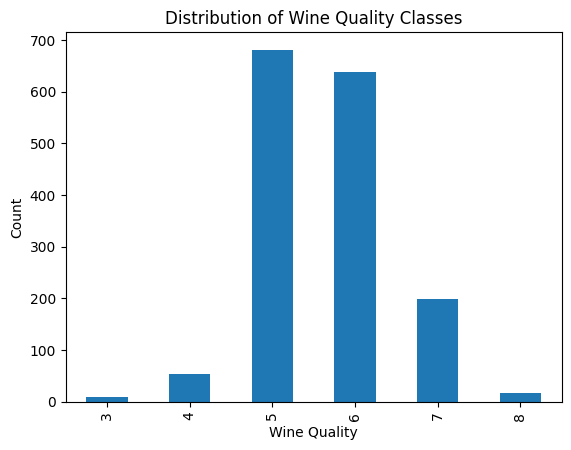

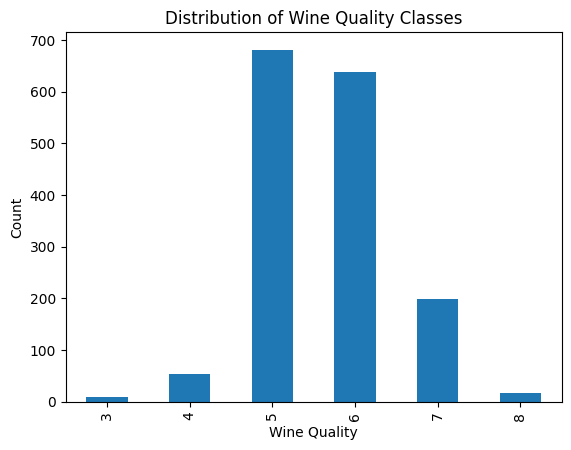

In [83]:
class_distribution_check(data, data['quality'])

#### 3.2.2 Feature Distribution and Outlier Detection
Write a function that creates box plots for each feature to visualise the distribution of values and detect any outliers. Return the figure.

In [84]:
### START FUNCTION
def feature_distribution_and_outliers(data):
### Insert your code here
    """
    Create box plots for each feature to visualize distributions and detect outliers.
    
    Parameters:
        data (pd.DataFrame): The features dataframe
    
    Returns:
        matplotlib.figure.Figure: The figure containing box plots
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=data, ax=ax)
    ax.set_title("Feature Distribution and Outlier Detection")
    plt.xticks(rotation=45)
    
    return fig

### END FUNCTION

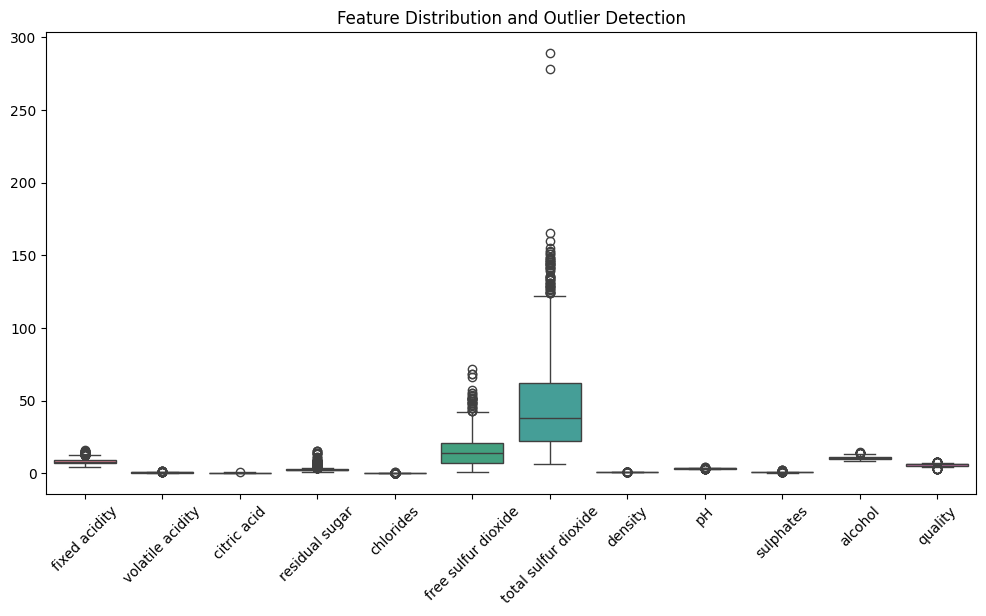

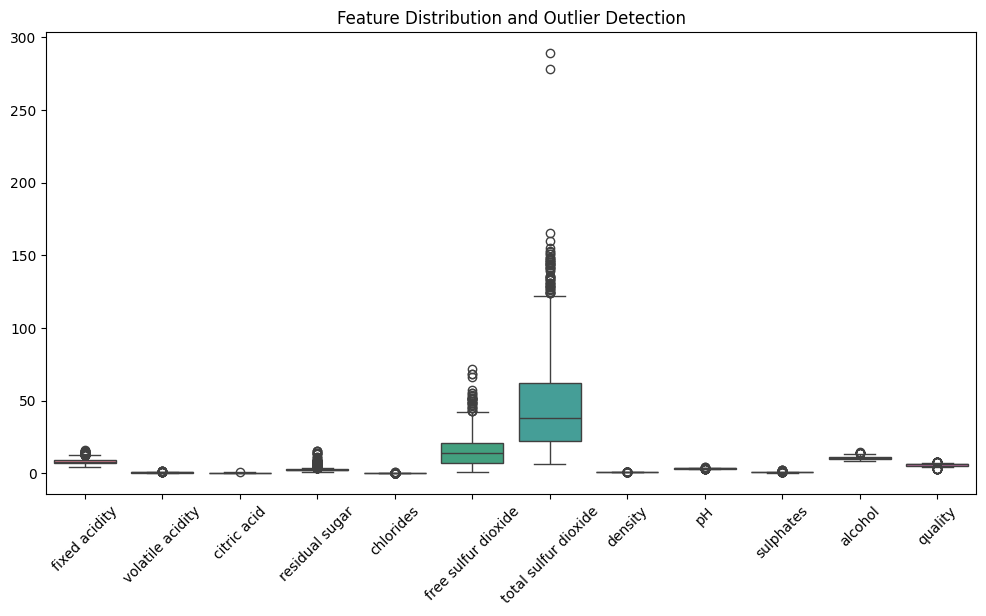

In [85]:
feature_distribution_and_outliers(data)

#### 3.2.3 Correlation Heatmap
Create a function that generates a heatmap that shows the correlation (relationship) between features and the target variable (`quality`). This will help you understand which features are most important to the prediction of wine quality.

In [87]:
### START FUNCTION
def correlation_analysis(data, quality):
### Insert your code here
    """
    Generate a heatmap showing the correlation between features and wine quality.
    
    Parameters:
        data (pd.DataFrame): The features dataframe
        quality (pd.Series): The target variable (wine quality)
    
    Returns:
        matplotlib.figure.Figure: The figure containing the heatmap
    """
    data['quality'] = quality  # Add quality back to compute correlations
    correlation_matrix = data.corr()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)
    ax.set_title("Feature Correlation Heatmap")
    
    return fig

### END FUNCTION

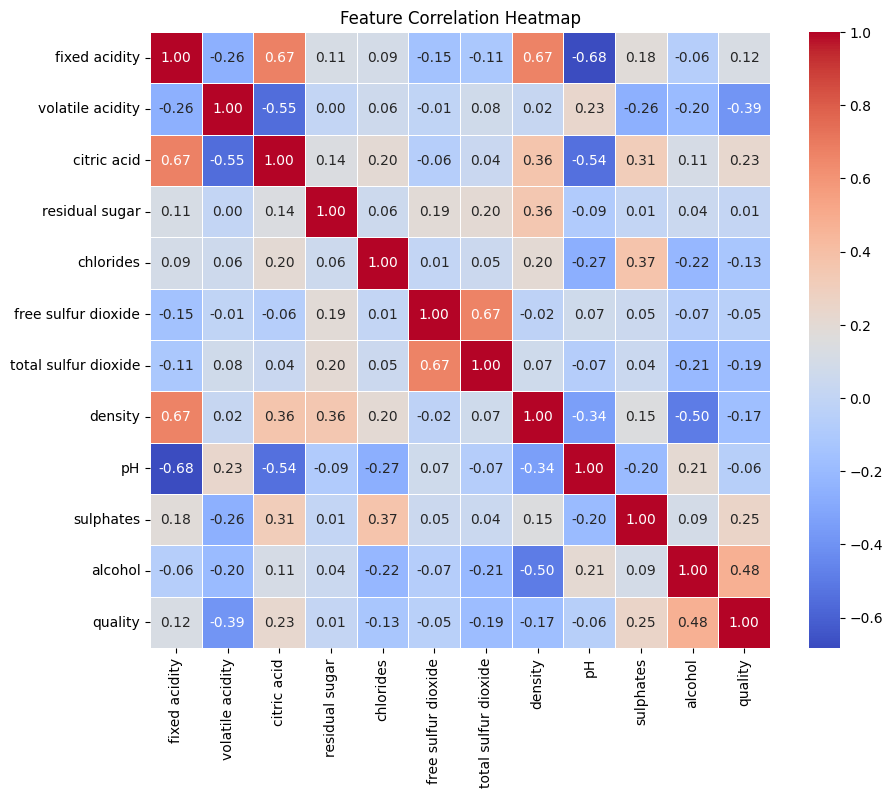

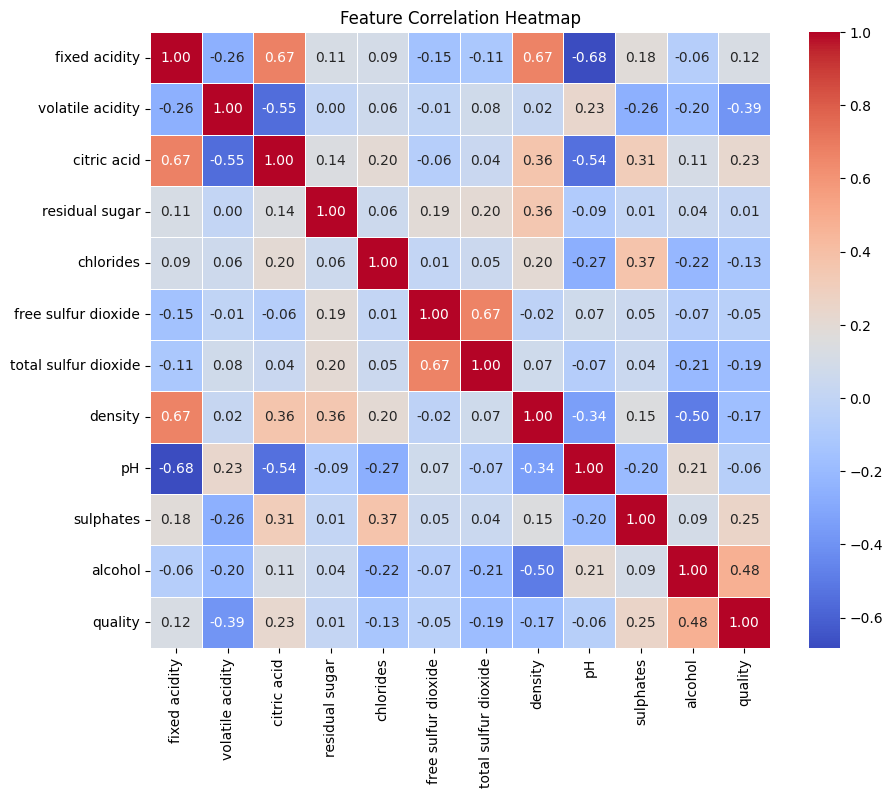

In [88]:
correlation_analysis(data, data['quality'])

#### 3.3 Regression Models

Apply different regression techniques to predict wine quality based on the dataset, evaluate the performance of their models, and visualise the results.

#### 3.3.1 Simple Linear Regression
Implement a simple linear regression model using one feature, `sulphates`, to predict wine quality. Calculate the model metrics (R-squared and MSE) and visualise the regression line and the residuals on two separate graphs. Use a test_size= 0.2 and set random_state=42. The function must return the model, the 2 figures, the R-squared and Mean Squared Error.

In [95]:
### START FUNCTION
def perform_simple_regression(data, feature='sulphates'):
### Insert your code here
    """
    Perform simple linear regression using a single feature to predict wine quality.
    
    Parameters:
        df (pd.DataFrame): The wine dataset
        feature (str): The feature to use for regression (default is 'sulphates')
    
    Returns:
        model: The trained linear regression model
        fig: The regression line plot
        fig_res: The residual plot
        r2: The R-squared score
        mse: The Mean Squared Error
    """
    X = data[[feature]]
    y = data['quality']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Regression line plot
    fig, ax = plt.subplots()
    ax.scatter(X_test, y_test, label="Actual Values", color='blue')
    ax.plot(X_test, y_pred, label="Regression Line", color='red')
    ax.set_xlabel(feature)
    ax.set_ylabel("Wine Quality")
    ax.set_title(f"Simple Linear Regression: {feature} vs. Wine Quality")
    ax.legend()
    
    # Residual plot
    residuals = y_test - y_pred
    fig_res, ax_res = plt.subplots()
    ax_res.scatter(y_pred, residuals, color='purple')
    ax_res.axhline(y=0, color='black', linestyle='--')
    ax_res.set_xlabel("Predicted Quality")
    ax_res.set_ylabel("Residuals")
    ax_res.set_title("Residual Plot")
    
    return model, fig, fig_res, r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

### END FUNCTION

(LinearRegression(),
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 0.07347976746285034,
 np.float64(0.6054864007925149))

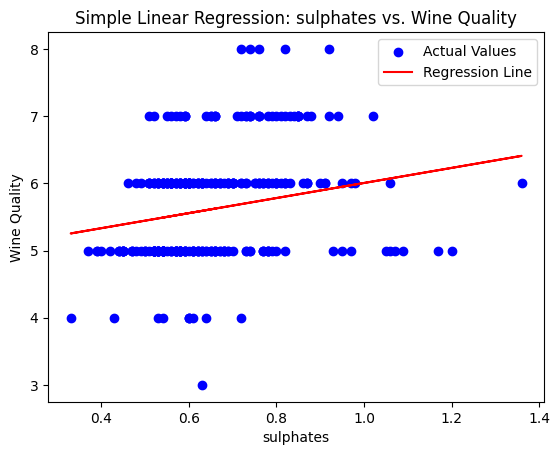

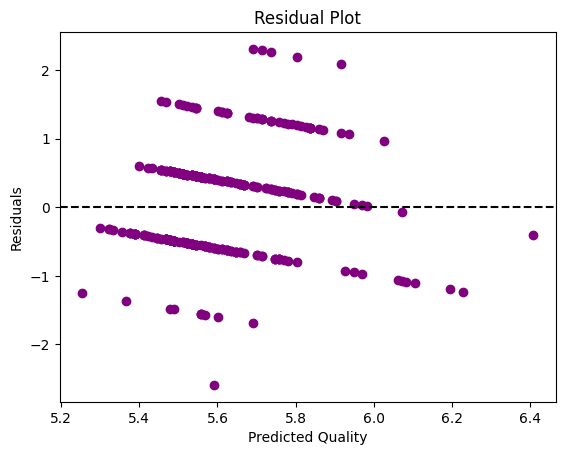

In [96]:
perform_simple_regression(data, feature='sulphates')

#### 3.3.2 Multiple Linear Regression
Write a function to perform multiple linear regression using the following features: [`alcohol`, `volatile acidity`, `sulphates`, `citric acid`] to predict wine quality. Calculate the model metrics (R-squared and MSE) and visualise the model coefficients using a bar plot. Use a `test_size=0.2` and set `random_state=42`. The function must return the model, the figure, the R-squared and Mean Squared Error. 

In [97]:
### START FUNCTION
def perform_multiple_regression(data, features=['alcohol', 'volatile acidity', 'sulphates', 'citric acid']):
### Insert your code here
    """
    Perform multiple linear regression using selected features to predict wine quality.
    
    Parameters:
        df (pd.DataFrame): The wine dataset
        features (list): List of features to use for regression
    
    Returns:
        model: The trained multiple linear regression model
        fig: The bar plot of model coefficients
        r2: The R-squared score
        mse: The Mean Squared Error
    """
    X = data[features]
    y = data['quality']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Coefficients bar plot
    fig, ax = plt.subplots()
    ax.bar(features, model.coef_, color='green')
    ax.set_xlabel("Features")
    ax.set_ylabel("Coefficient Value")
    ax.set_title("Multiple Regression Coefficients")
    plt.xticks(rotation=45)
    
    return model, fig, r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

### END FUNCTION

(LinearRegression(),
 <Figure size 640x480 with 1 Axes>,
 0.3875856874490631,
 np.float64(0.4002163416171499))

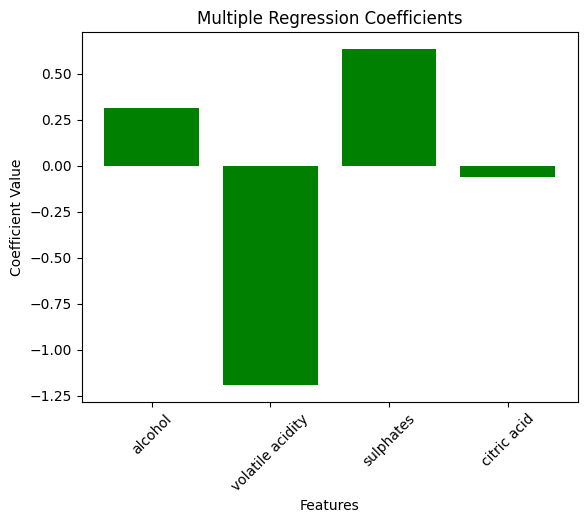

In [98]:
perform_multiple_regression(data, features=['alcohol', 'volatile acidity', 'sulphates', 'citric acid'])

#### 3.3.3. Polynomial Regression
Create a polynomial regression model using one feature, `sulphates`, with a degree of 2. Use a `test_size=0.2` and set `random_state=42`. The function must return the model, the figure, the R-squared and Mean Squared Error. Compare its performance to the simple linear regression model.

In [103]:
### START FUNCTION
def perform_polynomial_regression(data, feature, degree=2):
    """
    Perform polynomial regression using a single feature.
    
    Parameters:
        df (pd.DataFrame): The wine dataset
        feature (str): The feature to use for regression
        degree (int): The degree of the polynomial
    
    Returns:
        model: The trained polynomial regression model
        fig: The regression curve plot
        r2: The R-squared score
        mse: The Mean Squared Error
    """
    X = data[[feature]]
    y = data['quality']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    fig, ax = plt.subplots()
    ax.scatter(X_test, y_test, label="Actual Values", color='blue')
    ax.scatter(X_test, y_pred, label="Predicted Values", color='red')
    ax.set_xlabel(feature)
    ax.set_ylabel("Wine Quality")
    ax.set_title(f"Polynomial Regression (Degree {degree}): {feature} vs. Wine Quality")
    ax.legend()
    
    return model, fig, r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

### END FUNCTION

(Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 <Figure size 640x480 with 1 Axes>,
 0.2315566318953165,
 np.float64(0.5021822436542707))

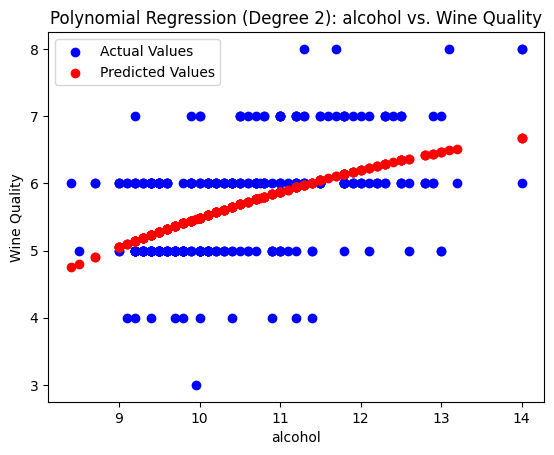

In [104]:
perform_polynomial_regression(data, 'alcohol', degree=2)

In [ ]:
conn.close() # Close the connecton

### END